In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
train = pd.read_csv('/workspaces/AITemplate/Kaggle/Titanic/Datasets/Titanic_train.csv')
test = pd.read_csv('/workspaces/AITemplate/Kaggle/Titanic/Datasets/Titanic_test.csv')

2024-01-25 22:20:12.096649: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-25 22:20:12.127577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-25 22:20:12.127606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-25 22:20:12.128651: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 22:20:12.134212: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-25 22:20:12.135059: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#Change the categorical data to numerical data
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"] = train["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
train["Embarked"].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [4]:
#Change the categorical data to numerical data
test["Embarked"] = test["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
test["Embarked"].value_counts()

Embarked
0    270
1    102
2     46
Name: count, dtype: int64

In [5]:
train["Sex"] = train["Sex"].fillna("male")
train["Sex"] = train["Sex"].map({"male": 0, "female": 1}).astype(int)
train["Sex"].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [6]:
test["Sex"] = test["Sex"].fillna("male")
test["Sex"] = test["Sex"].map({"male": 0, "female": 1}).astype(int)
test["Sex"].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [7]:
train.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

In [8]:
test.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [9]:
train = train.dropna()

In [10]:
test["Age"].fillna(test.Age.mean(), inplace=True)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [13]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1)

Epoch 1/10
179/179 [==============================] - 1s 992us/step - loss: 0.7092 - accuracy: 0.6653
Epoch 2/10
179/179 [==============================] - 0s 969us/step - loss: 0.6395 - accuracy: 0.6751
Epoch 3/10
179/179 [==============================] - 0s 968us/step - loss: 0.6502 - accuracy: 0.6709
Epoch 4/10
179/179 [==============================] - 0s 975us/step - loss: 0.5896 - accuracy: 0.7227
Epoch 5/10
179/179 [==============================] - 0s 966us/step - loss: 0.5535 - accuracy: 0.7451
Epoch 6/10
179/179 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7297
Epoch 7/10
179/179 [==============================] - 0s 934us/step - loss: 0.5421 - accuracy: 0.7409
Epoch 8/10
179/179 [==============================] - 0s 937us/step - loss: 0.5158 - accuracy: 0.7549
Epoch 9/10
179/179 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.7689
Epoch 10/10
14/14 [==============================] - 0s 750us/step
[[0]
 [0]
 [0]
 [0]

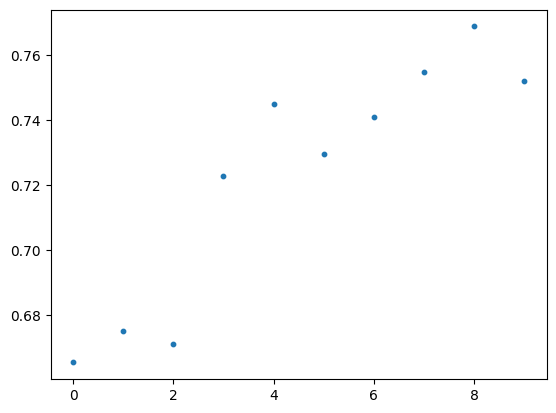

In [14]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

number_of_epochs = 10
model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=4, verbose=1)

plt.scatter(range(number_of_epochs), model.history.history['accuracy'], s=10)
predictions = (model.predict(X_test) > 0.5).astype(int)
print(predictions[:10])

In [15]:
# Creating a submission file
def make_submission(kaggle_predictions):
    path="/workspaces/AITemplate/Kaggle/Titanic/Submissions/NeuralNetworkSubmission5.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")
    
kaggle_predictions = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions.reshape(-1)

})
make_submission(kaggle_predictions)

Submission exported to /workspaces/AITemplate/Kaggle/Titanic/Submissions/NeuralNetworkSubmission5.csv
